In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

usando a versao reduzida da mimic iv-demo

In [166]:
file1 = pd.read_csv("C:\\Users\\beatr\\Downloads\\mimic-iv-clinical-database-demo-2.2 2\\mimic-iv-clinical-database-demo-2.2\\hosp\\admissions.csv.gz")
columns = ['subject_id','admittime']
file1=file1[columns]
file1.columns = file1.columns.str.strip() 
file1.head()

,subject_id,admittime
0,10004235,2196-02-24 14:38:00
1,10009628,2153-09-17 17:08:00
2,10018081,2134-08-18 02:02:00
3,10006053,2111-11-13 23:39:00
4,10031404,2113-08-04 18:46:00


nao existe valores NaN

In [167]:
file1.isna().sum() 

subject_id    0
admittime     0
dtype: int64

criando listas de icd code para cada subject id e criando novas colunas que representam positivo ou negativo pra sepse, diabetes, calafrios, hipertensao, hipotermia, febre, hipoglicemia e confusao mental.

In [168]:
file2 = pd.read_csv("C:\\Users\\beatr\\Downloads\\mimic-iv-clinical-database-demo-2.2 2\\mimic-iv-clinical-database-demo-2.2\\hosp\\diagnoses_icd.csv.gz")
file2.columns = file2.columns.str.strip()
columns = ['subject_id','icd_code','icd_version']
file2=file2[columns]
file2 = file2.groupby('subject_id').agg({
    'icd_code': lambda x: list(x),
    'icd_version': lambda x: list(x)
}).reset_index()
file2.head()

,subject_id,icd_code,icd_version
0,10000032,"[2761, V08, 2875, 3051, 5715, 496, 07071, 7895...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
1,10001217,"[V168, V161, 04109, 3485, 4019, 3484, 3240, 34...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
2,10001725,"[49390, 7291, 6185, 56400, 5641, E9352, 6186, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
3,10002428,"[4019, 29281, 4240, 00845, 1122, 7102, 73300, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
4,10002495,"[R310, N179, Z7901, Z86718, I214, A047, Z23, K...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."


In [169]:
file3 = pd.read_csv("C:\\Users\\beatr\\Downloads\\mimic-iv-clinical-database-demo-2.2 2\\mimic-iv-clinical-database-demo-2.2\\hosp\\d_icd_diagnoses.csv.gz")
file3.columns = file3.columns.str.strip()

In [170]:
sepse_matches = file3[file3['long_title'].str.contains('sepsis', case=False, na=False)]
unique_icd_codes = sepse_matches[['icd_code','icd_version']].drop_duplicates()
lista_sepse = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_sepse)

[('67020', 9), ('77181', 9), ('67022', 9), ('67024', 9), ('99591', 9), ('99592', 9), ('A4189', 10), ('A5486', 10), ('A41', 10), ('A227', 10), ('A427', 10), ('A408', 10), ('A4153', 10), ('O0387', 10), ('A400', 10), ('O85', 10), ('O0487', 10), ('R652', 10), ('O0337', 10), ('T8144XS', 10), ('P362', 10), ('A409', 10), ('A4151', 10), ('A40', 10), ('T8144', 10), ('T8144XD', 10), ('A411', 10), ('A410', 10), ('P368', 10), ('O0882', 10), ('P360', 10), ('O0737', 10), ('P361', 10), ('A413', 10), ('A403', 10), ('P369', 10), ('A267', 10), ('A4101', 10), ('A414', 10), ('A419', 10), ('O8604', 10), ('P363', 10), ('P3630', 10), ('A021', 10), ('A4102', 10), ('A4181', 10), ('A418', 10), ('A401', 10), ('A412', 10), ('B377', 10), ('P3639', 10), ('P365', 10), ('A4150', 10), ('A4159', 10), ('P3619', 10), ('A415', 10), ('A327', 10), ('R6520', 10), ('P3610', 10), ('R6521', 10), ('T8144XA', 10), ('P36', 10), ('A4152', 10), ('P364', 10)]


In [171]:
diabetes_matches = file3[file3['long_title'].str.contains('diabetes', case=False)]
unique_icd_codes = diabetes_matches[['icd_code','icd_version']].drop_duplicates()
lista_diabetes = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_diabetes)

[('25010', 9), ('25053', 9), ('25050', 9), ('3572', 9), ('24931', 9), ('24921', 9), ('25020', 9), ('25033', 9), ('25012', 9), ('25073', 9), ('25083', 9), ('25090', 9), ('25061', 9), ('25072', 9), ('24900', 9), ('25031', 9), ('25052', 9), ('24991', 9), ('25092', 9), ('24930', 9), ('24950', 9), ('24951', 9), ('25062', 9), ('7751', 9), ('24941', 9), ('25011', 9), ('25013', 9), ('24960', 9), ('25000', 9), ('25030', 9), ('25041', 9), ('64802', 9), ('25080', 9), ('24901', 9), ('24990', 9), ('25032', 9), ('5881', 9), ('V1221', 9), ('V180', 9), ('24910', 9), ('64804', 9), ('24920', 9), ('24970', 9), ('25042', 9), ('25063', 9), ('64803', 9), ('25093', 9), ('25081', 9), ('25021', 9), ('25051', 9), ('25091', 9), ('25023', 9), ('25001', 9), ('25082', 9), ('64801', 9), ('24980', 9), ('25002', 9), ('24961', 9), ('25022', 9), ('64800', 9), ('24940', 9), ('25003', 9), ('25040', 9), ('25043', 9), ('25060', 9), ('2535', 9), ('V771', 9), ('24971', 9), ('24981', 9), ('24911', 9), ('25070', 9), ('25071', 9

In [172]:
febre_matches = file3[file3['long_title'].str.contains('fever', case=False)]
unique_icd_codes = febre_matches[['icd_code','icd_version']].drop_duplicates()
lista_febre = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_febre)

[('78060', 9), ('390', 9), ('0023', 9), ('0821', 9), ('0651', 9), ('0820', 9), ('0871', 9), ('0658', 9), ('0601', 9), ('06640', 9), ('06642', 9), ('0659', 9), ('0653', 9), ('0269', 9), ('0787', 9), ('06641', 9), ('0662', 9), ('78063', 9), ('78064', 9), ('0650', 9), ('0029', 9), ('0848', 9), ('V734', 9), ('0021', 9), ('0261', 9), ('27731', 9), ('V044', 9), ('0663', 9), ('06649', 9), ('0782', 9), ('78062', 9), ('0654', 9), ('0661', 9), ('0879', 9), ('0609', 9), ('0660', 9), ('E9493', 9), ('0020', 9), ('0870', 9), ('78061', 9), ('0260', 9), ('7806', 9), ('0822', 9), ('0341', 9), ('0831', 9), ('0600', 9), ('0022', 9), ('0830', 9), ('9793', 9), ('0772', 9), ('A681', 10), ('A770', 10), ('A012', 10), ('A779', 10), ('A921', 10), ('A93', 10), ('A960', 10), ('A962', 10), ('A752', 10), ('A99', 10), ('A01', 10), ('A482', 10), ('A680', 10), ('A969', 10), ('A988', 10), ('A950', 10), ('A959', 10), ('A968', 10), ('A0102', 10), ('A753', 10), ('A938', 10), ('A961', 10), ('R5083', 10), ('A790', 10), ('A9

In [173]:
hipertensao_matches = file3[file3['long_title'].str.contains('hypertension', case=False)]
unique_icd_codes = hipertensao_matches[['icd_code','icd_version']].drop_duplicates()
lista_hipertensao = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_hipertensao)

[('40519', 9), ('64203', 9), ('45931', 9), ('64273', 9), ('99791', 9), ('45933', 9), ('64204', 9), ('64234', 9), ('40511', 9), ('64270', 9), ('64271', 9), ('64274', 9), ('64232', 9), ('64291', 9), ('64294', 9), ('64612', 9), ('4160', 9), ('4010', 9), ('40591', 9), ('5723', 9), ('V811', 9), ('64233', 9), ('45939', 9), ('3482', 9), ('64621', 9), ('64231', 9), ('64624', 9), ('4019', 9), ('64211', 9), ('64290', 9), ('64620', 9), ('64202', 9), ('64214', 9), ('64272', 9), ('64210', 9), ('64220', 9), ('36504', 9), ('64223', 9), ('64293', 9), ('64221', 9), ('7962', 9), ('64224', 9), ('64623', 9), ('64212', 9), ('64613', 9), ('64292', 9), ('45932', 9), ('64200', 9), ('64222', 9), ('40509', 9), ('64622', 9), ('4011', 9), ('64611', 9), ('64213', 9), ('40501', 9), ('40599', 9), ('64201', 9), ('64614', 9), ('45930', 9), ('64230', 9), ('64610', 9), ('O1042', 10), ('O119', 10), ('I270', 10), ('I87323', 10), ('O10411', 10), ('I2729', 10), ('O135', 10), ('O139', 10), ('O163', 10), ('H4005', 10), ('I873

In [174]:
hipoglicemia_matches = file3[file3['long_title'].str.contains('hypoglycemia', case=False)]
unique_icd_codes = hipoglicemia_matches[['icd_code','icd_version']].drop_duplicates()
lista_hipoglicemia = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_hipoglicemia)

[('2512', 9), ('7756', 9), ('2511', 9), ('E10641', 10), ('E1164', 10), ('E161', 10), ('E11641', 10), ('E08649', 10), ('E1364', 10), ('E09641', 10), ('E11649', 10), ('E162', 10), ('E08641', 10), ('E0964', 10), ('E160', 10), ('E10649', 10), ('P703', 10), ('E1064', 10), ('P704', 10), ('E13641', 10), ('E09649', 10), ('E13649', 10), ('E0864', 10)]


In [175]:
hipotermia_matches = file3[file3['long_title'].str.contains('hypothermia', case=False)]
unique_icd_codes = hipotermia_matches[['icd_code','icd_version']].drop_duplicates()
lista_hipotermia = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_hipotermia)

[('9916', 9), ('7783', 9), ('78065', 9), ('T8851XS', 10), ('T68XXXS', 10), ('P809', 10), ('T68XXXD', 10), ('T68', 10), ('T8851XA', 10), ('R680', 10), ('P80', 10), ('P808', 10), ('T68XXXA', 10), ('T8851XD', 10), ('T8851', 10)]


In [176]:
confusao_matches = file3[file3['long_title'].str.contains('altered mental status', case=False)]
unique_icd_codes = confusao_matches[['icd_code','icd_version']].drop_duplicates()
lista_confusao = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_confusao)

[('78097', 9), ('R4182', 10)]


In [177]:
calafrios_matches = file3[file3['long_title'].str.contains('chills', case=False)]
unique_icd_codes = calafrios_matches[['icd_code','icd_version']].drop_duplicates()
lista_calafrios = list(unique_icd_codes.itertuples(index=False, name=None))
print(lista_calafrios)

[('78064', 9), ('R6883', 10)]


agora criando colunas no file2 para cada paciente que representa o sintoma

In [178]:
# Função para verificar a presença de qualquer código ICD na lista de códigos
def has_icd(codes, versions, icd_list):
    for code, version in zip(codes, versions):
        if (code.strip(), int(version)) in icd_list:
            return True
    return False

# Criar colunas binárias para sepse e calafrios
file2['sepse'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_sepse), axis=1)
file2['calafrios'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_calafrios), axis=1)
file2['confusao mental'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_confusao), axis=1)
file2['diabetes'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_diabetes), axis=1)
file2['hipotermia'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_hipotermia), axis=1)
file2['hipertensao'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_hipertensao), axis=1)
file2['febre'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_febre), axis=1)
file2['hipoglicemia'] = file2.apply(lambda row: has_icd(row['icd_code'], row['icd_version'], lista_hipoglicemia), axis=1)

# Convertendo os valores booleanos para inteiros (0 ou 1)
file2['sepse'] = file2['sepse'].astype(int)
file2['calafrios'] = file2['calafrios'].astype(int)
file2['confusao mental'] = file2['confusao mental'].astype(int)
file2['diabetes'] = file2['diabetes'].astype(int)
file2['hipotermia'] = file2['hipotermia'].astype(int)
file2['hipertensao'] = file2['hipertensao'].astype(int)
file2['febre'] = file2['febre'].astype(int)
file2['hipoglicemia'] = file2['hipoglicemia'].astype(int)

# Exibindo as primeiras linhas do DataFrame atualizado para verificação
print(file2.head())

   subject_id                                           icd_code  \
0    10000032  [2761, V08, 2875, 3051, 5715, 496, 07071, 7895...   
1    10001217  [V168, V161, 04109, 3485, 4019, 3484, 3240, 34...   
2    10001725  [49390, 7291, 6185, 56400, 5641, E9352, 6186, ...   
3    10002428  [4019, 29281, 4240, 00845, 1122, 7102, 73300, ...   
4    10002495  [R310, N179, Z7901, Z86718, I214, A047, Z23, K...   

                                         icd_version  sepse  calafrios  \
0  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...      0          0   
1  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...      0          0   
2  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...      0          0   
3  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...      1          0   
4  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...      0          0   

   confusao mental  diabetes  hipotermia  hipertensao  febre  hipoglicemia  
0                0         0           0            1      0         

In [179]:
columns = ['subject_id','sepse','calafrios','confusao mental','diabetes','hipotermia','hipertensao','febre','hipoglicemia']
file2 = file2[columns]
file2.head()

,subject_id,sepse,calafrios,confusao mental,diabetes,hipotermia,hipertensao,febre,hipoglicemia
0,10000032,0,0,0,0,0,1,0,0
1,10001217,0,0,0,0,0,1,0,0
2,10001725,0,0,0,0,0,0,0,0
3,10002428,1,0,1,0,0,1,0,0
4,10002495,0,0,0,1,0,1,0,0


realizando o merge e criando uma unica tabela

In [180]:
file1 = pd.DataFrame(file1)
file2 = pd.DataFrame(file2)

# Realizando o merge
df = pd.merge(file1, file2, on='subject_id', how='inner')

# Verificar o resultado
print(df.head())

   subject_id            admittime  sepse  calafrios  confusao mental  \
0    10004235  2196-02-24 14:38:00      1          0                0   
1    10004235  2196-06-20 21:11:00      1          0                0   
2    10004235  2196-06-14 08:30:00      1          0                0   
3    10009628  2153-09-17 17:08:00      0          0                0   
4    10018081  2134-08-18 02:02:00      1          0                0   

   diabetes  hipotermia  hipertensao  febre  hipoglicemia  
0         0           0            1      1             0  
1         0           0            1      1             0  
2         0           0            1      1             0  
3         1           0            0      0             0  
4         0           0            1      0             0  


In [181]:
colums = ['subject_id','admittime','sepse','calafrios','confusao mental','diabetes','hipotermia','hipertensao','febre','hipoglicemia']
df = df[colums]
df.head()

,subject_id,admittime,sepse,calafrios,confusao mental,diabetes,hipotermia,hipertensao,febre,hipoglicemia
0,10004235,2196-02-24 14:38:00,1,0,0,0,0,1,1,0
1,10004235,2196-06-20 21:11:00,1,0,0,0,0,1,1,0
2,10004235,2196-06-14 08:30:00,1,0,0,0,0,1,1,0
3,10009628,2153-09-17 17:08:00,0,0,0,1,0,0,0,0
4,10018081,2134-08-18 02:02:00,1,0,0,0,0,1,0,0


In [182]:
# Supondo que seu DataFrame se chama df
count_sepsis = df['sepse'].sum()
print("Número de casos de sepse:", count_sepsis)

Número de casos de sepse: 75


In [183]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
df['admittime'] = pd.to_datetime(df['admittime'])
df.index = df['admittime']
df.drop(columns=['admittime'], inplace=True)
df.head()


,subject_id,sepse,calafrios,confusao mental,diabetes,hipotermia,hipertensao,febre,hipoglicemia
admittime,,,,,,,,,
2196-02-24 14:38:00,10004235,1,0,0,0,0,1,1,0
2196-06-20 21:11:00,10004235,1,0,0,0,0,1,1,0
2196-06-14 08:30:00,10004235,1,0,0,0,0,1,1,0
2153-09-17 17:08:00,10009628,0,0,0,1,0,0,0,0
2134-08-18 02:02:00,10018081,1,0,0,0,0,1,0,0


In [185]:
print(df.dtypes)

subject_id         int64
sepse              int32
calafrios          int32
confusao mental    int32
diabetes           int32
hipotermia         int32
hipertensao        int32
febre              int32
hipoglicemia       int32
dtype: object


In [192]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Normalização dos dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['subject_id']))


C:\Users\beatr\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\beatr\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\beatr\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\beatr\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

In [193]:
# Definição do comprimento da sequência e número de recursos
sequence_length = 10
num_features = scaled_data.shape[1]

# Criação de sequências e rótulos correspondentes
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length-1][0]  # 'sepse' column index (0)
    sequences.append(seq)
    labels.append(label)

# Conversão para arrays numpy
sequences = np.array(sequences)
labels = np.array(labels)

smote = SMOTE()
sequences_reshaped = sequences.reshape((sequences.shape[0], -1))
sequences_balanced, labels_balanced = smote.fit_resample(sequences_reshaped, labels)
sequences_balanced = sequences_balanced.reshape((sequences_balanced.shape[0], sequence_length, num_features))

# Divisão em conjuntos de treinamento e teste
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (212, 10, 8)
Train Y shape: (212,)
Test X shape: (53, 10, 8)
Test Y shape: (53,)


In [194]:
# Calcular pesos das classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

model = Sequential()
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))  

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Definição dos callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

# Predições no conjunto de teste
predictions = (model.predict(test_x) > 0.5).astype("int32")

# Relatório de classificação
print(classification_report(test_y, predictions))


C:\Users\beatr\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.4928 - loss: 0.9400 - val_accuracy: 0.0465 - val_loss: 0.7037
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7429 - loss: 0.5392 - val_accuracy: 0.0465 - val_loss: 0.7147
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7645 - loss: 0.4441 - val_accuracy: 0.0465 - val_loss: 0.7149
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8489 - loss: 0.3401 - val_accuracy: 0.0465 - val_loss: 0.7184
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8410 - loss: 0.3397 - val_accuracy: 0.0465 - val_loss: 0.7174
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8734 - loss: 0.3038 - val_accuracy: 0.0930 - val_loss: 0.7165
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8842 - loss: 0.3257 - val_accuracy: 0.3256 - val_loss: 0.7079
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8421 - loss: 0.2862 - val_accuracy: 0.5116 - val_loss

In [195]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_91 (LSTM)                  │ (None, 10, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_92 (LSTM)                  │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,797 (1.52 MB)

 Trainable params: 132,449 (517.38 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 264,900 (1.01 MB)

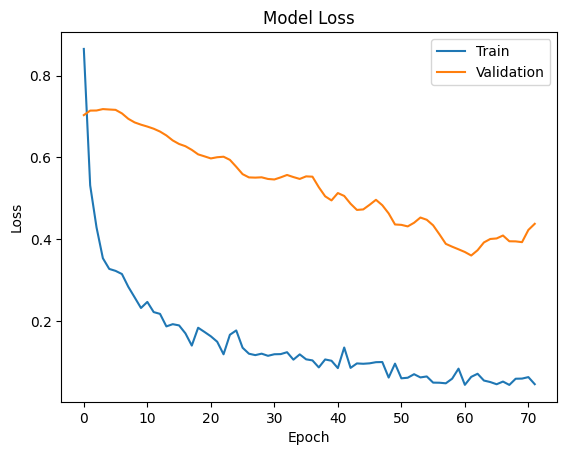

In [196]:
# Plotagem dos valores de perda de treinamento e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

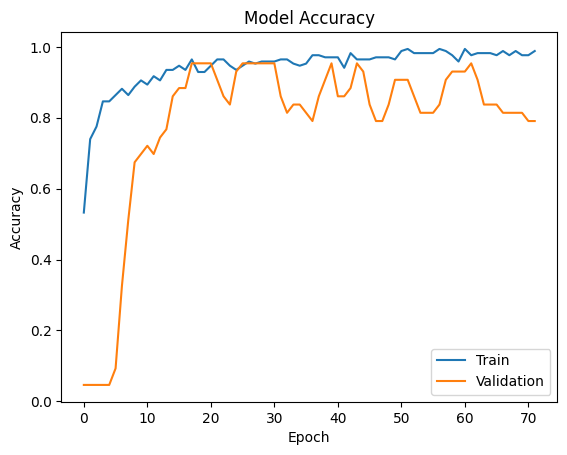

In [197]:
# Plotagem da acurácia de treinamento e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()